**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

**Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

**Load DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/MPHARM/00_MPH/Final/SVR_top 50.xlsx")
df

,pCC50,ATS0m,ATS2m,ATS3m,ATS4m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,...,ATSC2v,ATSC4v,ATSC5v,ATSC6v,ATSC8v,VR1_Dt,ECCEN,TPC,VR1_D,WPATH
0,4.176200,5195.59,6352.43,6616.62,6324.67,5969.51,5837.40,3022.29,9042.13,10765.86,...,-132.87,-102.85,-506.66,184.80,121.83,218.64,350,591,207.60,907
1,3.790995,5195.59,6352.43,7064.33,6394.11,7556.15,4699.16,2747.48,9042.13,10765.86,...,-132.87,-397.78,-169.43,377.15,-573.74,205.74,348,590,249.21,893
2,3.657321,4299.82,5957.23,6188.25,5646.19,5412.27,3855.56,3007.45,8715.21,10577.69,...,-187.88,-164.72,-200.90,-99.34,76.52,238.54,381,592,186.67,921
3,3.871568,5195.59,6352.43,6616.62,5876.96,5659.29,4250.76,4160.53,9042.13,10765.86,...,-132.87,-271.99,-211.73,-152.43,355.92,238.54,381,592,186.67,921
4,4.356745,11579.22,8247.67,8670.91,8299.44,10074.94,9632.53,4997.06,9714.46,11196.93,...,-12.51,-49.73,-608.50,516.19,310.91,810.99,369,643,592.02,1028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.700929,11839.15,8964.83,9381.80,8163.80,8094.11,8897.93,8552.20,11021.95,12734.38,...,192.98,-342.51,495.15,355.95,-567.00,275.11,566,647,244.76,1601
96,4.499078,5601.81,7373.27,7686.64,7290.20,6363.99,6190.75,5615.74,10835.31,12956.30,...,343.62,-209.35,654.35,90.33,-546.66,275.11,566,647,244.76,1601
97,4.376441,5857.78,7625.40,8042.69,7652.79,6618.11,6624.54,6242.96,11051.70,13138.25,...,446.33,-563.17,383.56,479.08,-736.81,243.66,620,690,259.22,1808
98,3.980344,7194.91,8829.62,9288.16,8517.85,7730.53,8314.57,6972.27,11881.77,14071.86,...,-326.23,-709.25,351.95,244.46,-543.48,451.16,711,873,383.33,2206


In [ ]:
print(df.columns)

Index(['pCC50', 'ATS0m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS6m', 'ATS7m', 'ATS8m',
       'ATS0v', 'ATS1v', 'ATS2v', 'ATS3v', 'ATS4v', 'ATS6v', 'ATS7v', 'ATS8v',
       'ATS0i', 'ATS1i', 'ATS2i', 'ATS3i', 'ATS5i', 'ATS6i', 'ATS7i', 'ATS8i',
       'AATS0v', 'AATS1v', 'AATS2v', 'AATS3v', 'AATS4v', 'AATS5v', 'AATS6v',
       'AATS7v', 'AATS8v', 'ATSC2m', 'ATSC3m', 'ATSC4m', 'ATSC5m', 'ATSC7m',
       'ATSC8m', 'ATSC0v', 'ATSC1v', 'ATSC2v', 'ATSC4v', 'ATSC5v', 'ATSC6v',
       'ATSC8v', 'VR1_Dt', 'ECCEN', 'TPC', 'VR1_D', 'WPATH'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pCC50   100 non-null    float64
 1   ATS0m   100 non-null    float64
 2   ATS2m   100 non-null    float64
 3   ATS3m   100 non-null    float64
 4   ATS4m   100 non-null    float64
 5   ATS6m   100 non-null    float64
 6   ATS7m   100 non-null    float64
 7   ATS8m   100 non-null    float64
 8   ATS0v   100 non-null    float64
 9   ATS1v   100 non-null    float64
 10  ATS2v   100 non-null    float64
 11  ATS3v   100 non-null    float64
 12  ATS4v   100 non-null    float64
 13  ATS6v   100 non-null    float64
 14  ATS7v   100 non-null    float64
 15  ATS8v   100 non-null    float64
 16  ATS0i   100 non-null    float64
 17  ATS1i   100 non-null    float64
 18  ATS2i   100 non-null    float64
 19  ATS3i   100 non-null    float64
 20  ATS5i   100 non-null    float64
 21  ATS6i   100 non-null    float64
 22  ATS

**Checking for Null Values**

In [ ]:
df.isnull()

,pCC50,ATS0m,ATS2m,ATS3m,ATS4m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,...,ATSC2v,ATSC4v,ATSC5v,ATSC6v,ATSC8v,VR1_Dt,ECCEN,TPC,VR1_D,WPATH
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

pCC50     0
ATS0m     0
ATS2m     0
ATS3m     0
ATS4m     0
ATS6m     0
ATS7m     0
ATS8m     0
ATS0v     0
ATS1v     0
ATS2v     0
ATS3v     0
ATS4v     0
ATS6v     0
ATS7v     0
ATS8v     0
ATS0i     0
ATS1i     0
ATS2i     0
ATS3i     0
ATS5i     0
ATS6i     0
ATS7i     0
ATS8i     0
AATS0v    0
AATS1v    0
AATS2v    0
AATS3v    0
AATS4v    0
AATS5v    0
AATS6v    0
AATS7v    0
AATS8v    0
ATSC2m    0
ATSC3m    0
ATSC4m    0
ATSC5m    0
ATSC7m    0
ATSC8m    0
ATSC0v    0
ATSC1v    0
ATSC2v    0
ATSC4v    0
ATSC5v    0
ATSC6v    0
ATSC8v    0
VR1_Dt    0
ECCEN     0
TPC       0
VR1_D     0
WPATH     0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df2 = df.fillna(value = 0) 
df2

,pCC50,ATS0m,ATS2m,ATS3m,ATS4m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,...,ATSC2v,ATSC4v,ATSC5v,ATSC6v,ATSC8v,VR1_Dt,ECCEN,TPC,VR1_D,WPATH
0,4.176200,5195.59,6352.43,6616.62,6324.67,5969.51,5837.40,3022.29,9042.13,10765.86,...,-132.87,-102.85,-506.66,184.80,121.83,218.64,350,591,207.60,907
1,3.790995,5195.59,6352.43,7064.33,6394.11,7556.15,4699.16,2747.48,9042.13,10765.86,...,-132.87,-397.78,-169.43,377.15,-573.74,205.74,348,590,249.21,893
2,3.657321,4299.82,5957.23,6188.25,5646.19,5412.27,3855.56,3007.45,8715.21,10577.69,...,-187.88,-164.72,-200.90,-99.34,76.52,238.54,381,592,186.67,921
3,3.871568,5195.59,6352.43,6616.62,5876.96,5659.29,4250.76,4160.53,9042.13,10765.86,...,-132.87,-271.99,-211.73,-152.43,355.92,238.54,381,592,186.67,921
4,4.356745,11579.22,8247.67,8670.91,8299.44,10074.94,9632.53,4997.06,9714.46,11196.93,...,-12.51,-49.73,-608.50,516.19,310.91,810.99,369,643,592.02,1028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.700929,11839.15,8964.83,9381.80,8163.80,8094.11,8897.93,8552.20,11021.95,12734.38,...,192.98,-342.51,495.15,355.95,-567.00,275.11,566,647,244.76,1601
96,4.499078,5601.81,7373.27,7686.64,7290.20,6363.99,6190.75,5615.74,10835.31,12956.30,...,343.62,-209.35,654.35,90.33,-546.66,275.11,566,647,244.76,1601
97,4.376441,5857.78,7625.40,8042.69,7652.79,6618.11,6624.54,6242.96,11051.70,13138.25,...,446.33,-563.17,383.56,479.08,-736.81,243.66,620,690,259.22,1808
98,3.980344,7194.91,8829.62,9288.16,8517.85,7730.53,8314.57,6972.27,11881.77,14071.86,...,-326.23,-709.25,351.95,244.46,-543.48,451.16,711,873,383.33,2206


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pCC50   100 non-null    float64
 1   ATS0m   100 non-null    float64
 2   ATS2m   100 non-null    float64
 3   ATS3m   100 non-null    float64
 4   ATS4m   100 non-null    float64
 5   ATS6m   100 non-null    float64
 6   ATS7m   100 non-null    float64
 7   ATS8m   100 non-null    float64
 8   ATS0v   100 non-null    float64
 9   ATS1v   100 non-null    float64
 10  ATS2v   100 non-null    float64
 11  ATS3v   100 non-null    float64
 12  ATS4v   100 non-null    float64
 13  ATS6v   100 non-null    float64
 14  ATS7v   100 non-null    float64
 15  ATS8v   100 non-null    float64
 16  ATS0i   100 non-null    float64
 17  ATS1i   100 non-null    float64
 18  ATS2i   100 non-null    float64
 19  ATS3i   100 non-null    float64
 20  ATS5i   100 non-null    float64
 21  ATS6i   100 non-null    float64
 22  ATS

In [ ]:
df2.describe()

,pCC50,ATS0m,ATS2m,ATS3m,ATS4m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,...,ATSC2v,ATSC4v,ATSC5v,ATSC6v,ATSC8v,VR1_Dt,ECCEN,TPC,VR1_D,WPATH
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,...,100.00000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,4.152151,6353.688100,6940.211300,7345.021100,6635.455700,6260.246700,5711.03490,4266.661700,9659.37140,11514.694900,...,-31.78180,-294.119800,-122.787700,141.753800,-93.3078,363.563400,460.960000,611.61000,304.272800,1274.890000
std,0.399805,3049.696191,1386.614135,1666.999256,1421.416248,1643.058565,2035.34708,1835.634261,1292.75197,1546.959412,...,247.43973,256.194514,489.319275,401.330573,394.6520,347.724309,133.513433,128.96573,190.257858,461.377141
min,3.443866,2175.490000,3152.980000,2696.210000,1706.780000,1490.590000,745.29000,144.260000,5388.63000,5660.020000,...,-544.26000,-785.760000,-1287.330000,-1058.190000,-1279.2100,111.970000,186.000000,241.00000,99.000000,313.000000
25%,3.794065,4413.927500,6022.460000,6370.822500,5973.065000,5535.852500,4554.25000,3000.010000,9051.73000,10866.005000,...,-173.21250,-466.527500,-421.387500,-67.245000,-359.6225,213.180000,366.750000,578.00000,197.070000,930.000000
50%,4.278946,5341.880000,7002.480000,7366.275000,6736.660000,6319.735000,5511.15500,4215.750000,9750.90000,11724.580000,...,-35.22500,-273.415000,-318.475000,89.870000,-27.5800,275.110000,433.000000,610.00000,240.095000,1202.000000
75%,4.461207,6601.475000,7761.460000,8233.175000,7492.802500,7439.637500,6643.44250,5560.662500,10523.47000,12335.275000,...,156.77250,-111.580000,147.122500,361.250000,188.1600,381.790000,557.750000,652.00000,375.350000,1584.500000
max,5.154902,17930.190000,10252.700000,11137.740000,10132.020000,10074.940000,11676.47000,8976.220000,12123.40000,14608.910000,...,446.33000,617.790000,1149.320000,1557.480000,718.0300,2314.710000,723.000000,962.00000,1020.170000,2445.000000


**Input and Output Preparation**

In [ ]:
X = df2.drop(['pCC50'],axis = 1)
X

,ATS0m,ATS2m,ATS3m,ATS4m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,...,ATSC2v,ATSC4v,ATSC5v,ATSC6v,ATSC8v,VR1_Dt,ECCEN,TPC,VR1_D,WPATH
0,5195.59,6352.43,6616.62,6324.67,5969.51,5837.40,3022.29,9042.13,10765.86,15260.98,...,-132.87,-102.85,-506.66,184.80,121.83,218.64,350,591,207.60,907
1,5195.59,6352.43,7064.33,6394.11,7556.15,4699.16,2747.48,9042.13,10765.86,15260.98,...,-132.87,-397.78,-169.43,377.15,-573.74,205.74,348,590,249.21,893
2,4299.82,5957.23,6188.25,5646.19,5412.27,3855.56,3007.45,8715.21,10577.69,14884.64,...,-187.88,-164.72,-200.90,-99.34,76.52,238.54,381,592,186.67,921
3,5195.59,6352.43,6616.62,5876.96,5659.29,4250.76,4160.53,9042.13,10765.86,15260.98,...,-132.87,-271.99,-211.73,-152.43,355.92,238.54,381,592,186.67,921
4,11579.22,8247.67,8670.91,8299.44,10074.94,9632.53,4997.06,9714.46,11196.93,16123.12,...,-12.51,-49.73,-608.50,516.19,310.91,810.99,369,643,592.02,1028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11839.15,8964.83,9381.80,8163.80,8094.11,8897.93,8552.20,11021.95,12734.38,18216.78,...,192.98,-342.51,495.15,355.95,-567.00,275.11,566,647,244.76,1601
96,5601.81,7373.27,7686.64,7290.20,6363.99,6190.75,5615.74,10835.31,12956.30,18409.66,...,343.62,-209.35,654.35,90.33,-546.66,275.11,566,647,244.76,1601
97,5857.78,7625.40,8042.69,7652.79,6618.11,6624.54,6242.96,11051.70,13138.25,18493.43,...,446.33,-563.17,383.56,479.08,-736.81,243.66,620,690,259.22,1808
98,7194.91,8829.62,9288.16,8517.85,7730.53,8314.57,6972.27,11881.77,14071.86,20459.30,...,-326.23,-709.25,351.95,244.46,-543.48,451.16,711,873,383.33,2206


In [ ]:
Y = df2.pCC50
Y

0     4.176200
1     3.790995
2     3.657321
3     3.871568
4     4.356745
        ...   
95    4.700929
96    4.499078
97    4.376441
98    3.980344
99    4.311669
Name: pCC50, Length: 100, dtype: float64

In [ ]:
X.shape

(100, 50)

In [ ]:
Y.shape

(100,)

In [ ]:
corr = X.corr()

In [ ]:
corr

,ATS0m,ATS2m,ATS3m,ATS4m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,...,ATSC2v,ATSC4v,ATSC5v,ATSC6v,ATSC8v,VR1_Dt,ECCEN,TPC,VR1_D,WPATH
ATS0m,1.000000,0.864597,0.841794,0.749458,0.746334,0.750614,0.818351,0.559474,0.419393,0.433343,...,-0.341782,-0.166713,0.190366,-0.169857,-0.014371,0.050712,0.507856,0.256780,0.196605,0.467285
ATS2m,0.864597,1.000000,0.984734,0.943278,0.898872,0.815044,0.938830,0.874609,0.772236,0.778871,...,-0.479122,-0.159481,0.153814,-0.184227,0.000564,-0.016096,0.819612,0.596487,0.282247,0.806216
ATS3m,0.841794,0.984734,1.000000,0.954363,0.904605,0.741219,0.901432,0.874097,0.785348,0.788739,...,-0.460726,-0.150141,0.067801,-0.191048,0.027334,-0.033030,0.827765,0.592726,0.255051,0.817805
ATS4m,0.749458,0.943278,0.954363,1.000000,0.945170,0.782270,0.877767,0.897397,0.828512,0.838160,...,-0.366972,-0.009790,-0.023135,-0.144001,0.003168,-0.005891,0.777116,0.724971,0.302843,0.798651
ATS6m,0.746334,0.898872,0.904605,0.945170,1.000000,0.795691,0.824989,0.835312,0.763485,0.781442,...,-0.425408,0.065441,-0.059632,-0.100373,0.039298,0.100624,0.659732,0.730503,0.397246,0.689848
ATS7m,0.750614,0.815044,0.741219,0.782270,0.795691,1.000000,0.809438,0.646021,0.521297,0.542698,...,-0.297340,-0.025578,0.175161,-0.085239,-0.142208,-0.069321,0.468064,0.542932,0.421646,0.483228
ATS8m,0.818351,0.938830,0.901432,0.877767,0.824989,0.809438,1.000000,0.842912,0.740015,0.745799,...,-0.340405,-0.197196,0.255481,-0.123750,-0.040990,-0.041253,0.777677,0.586265,0.297750,0.757603
ATS0v,0.559474,0.874609,0.874097,0.897397,0.835312,0.646021,0.842912,1.000000,0.979367,0.977872,...,-0.430126,-0.042959,0.062042,-0.118077,-0.017970,-0.053062,0.919173,0.829450,0.274532,0.927145
ATS1v,0.419393,0.772236,0.785348,0.828512,0.763485,0.521297,0.740015,0.979367,1.000000,0.997098,...,-0.388168,0.003353,-0.019868,-0.075295,-0.002360,-0.049357,0.895056,0.863977,0.254049,0.912904
ATS2v,0.433343,0.778871,0.788739,0.838160,0.781442,0.542698,0.745799,0.977872,0.997098,1.000000,...,-0.393848,0.017035,-0.029677,-0.057054,0.001131,-0.025895,0.878653,0.883348,0.268151,0.901220


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,ATS0m,ATS2m,ATS3m,ATS4m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS6v,ATS7v,ATS8v,ATS0i,ATS1i,ATS2i,ATS3i,ATS5i,ATS6i,ATS7i,ATS8i,AATS0v,AATS1v,AATS2v,AATS3v,AATS4v,AATS5v,AATS6v,AATS7v,AATS8v,ATSC2m,ATSC3m,ATSC4m,ATSC5m,ATSC7m,ATSC8m,ATSC0v,ATSC1v,ATSC2v,ATSC4v,ATSC5v,ATSC6v,ATSC8v,VR1_Dt,ECCEN,TPC,VR1_D,WPATH
ATS0m,1.000000,0.864597,0.841794,0.749458,0.746334,0.750614,0.818351,0.559474,0.419393,0.433343,0.424820,0.335402,0.146898,0.229624,0.370696,0.168432,0.217829,0.131347,0.203483,0.071693,-0.097019,-0.079634,-0.094336,0.511764,0.462613,0.445454,0.319356,0.264576,0.159878,0.250692,0.376024,0.451829,-0.104428,-0.692693,-0.765983,0.256147,0.337515,0.065969,0.330298,0.141250,-0.341782,-0.166713,0.190366,-0.169857,-0.014371,0.050712,0.507856,0.256780,0.196605,0.467285
ATS2m,0.864597,1.000000,0.984734,0.943278,0.898872,0.815044,0.938830,0.874609,0.772236,0.778871,0.772559,0.696240,0.435460,0.505602,0.687293,0.530530,0.583028,0.472543,0.560126,0.418344,0.197187,0.201498,0.166811,0.426515,0.434734,0.417605,0.265994,0.242486,0.101556,0.138598,0.317292,0.518194,-0.202257,-0.453373,-0.662202,0.337690,0.292213,-0.015499,0.604718,0.311319,-0.479122,-0.159481,0.153814,-0.184227,0.000564,-0.016096,0.819612,0.596487,0.282247,0.806216
ATS3m,0.841794,0.984734,1.000000,0.954363,0.904605,0.741219,0.901432,0.874097,0.785348,0.788739,0.781270,0.709125,0.439709,0.482283,0.665587,0.556375,0.601082,0.504755,0.578869,0.429060,0.217908,0.226212,0.181402,0.384322,0.405739,0.374303,0.246449,0.233545,0.087458,0.103835,0.248848,0.479872,-0.234016,-0.332513,-0.675073,0.243441,0.280311,0.026333,0.624697,0.294955,-0.460726,-0.150141,0.067801,-0.191048,0.027334,-0.033030,0.827765,0.592726,0.255051,0.817805
ATS4m,0.749458,0.943278,0.954363,1.000000,0.945170,0.782270,0.877767,0.897397,0.828512,0.838160,0.845764,0.811442,0.624755,0.659267,0.759947,0.631968,0.676406,0.582541,0.662446,0.543980,0.403200,0.422008,0.368552,0.294319,0.324949,0.314194,0.186031,0.189453,0.093257,0.043700,0.184330,0.376900,-0.111509,-0.281346,-0.461698,0.144210,0.237656,0.020122,0.689221,0.303007,-0.366972,-0.009790,-0.023135,-0.144001,0.003168,-0.005891,0.777116,0.724971,0.302843,0.798651
ATS6m,0.746334,0.898872,0.904605,0.945170,1.000000,0.795691,0.824989,0.835312,0.763485,0.781442,0.781565,0.745590,0.679258,0.685703,0.707639,0.518419,0.569025,0.470585,0.589209,0.447526,0.397941,0.434288,0.370338,0.378159,0.419422,0.408308,0.232874,0.268226,0.221021,0.140560,0.222642,0.356080,-0.134764,-0.315350,-0.455711,0.095409,0.127856,0.049704,0.604714,0.319074,-0.425408,0.065441,-0.059632,-0.100373,0.039298,0.100624,0.659732,0.730503,0.397246,0.689848
ATS7m,0.750614,0.815044,0.741219,0.782270,0.795691,1.000000,0.809438,0.646021,0.521297,0.542698,0.564164,0.528113,0.509066,0.631078,0.606769,0.292810,0.350771,0.230351,0.345389,0.268348,0.205828,0.255377,0.239076,0.446518,0.412764,0.446698,0.289602,0.243831,0.221499,0.231734,0.402294,0.362505,0.102000,-0.664737,-0.425576,0.283331,0.495521,-0.182712,0.401800,0.176145,-0.297340,-0.025578,0.175161,-0.085239,-0.142208,-0.069321,0.468064,0.542932,0.421646,0.483228
ATS8m,0.818351,0.938830,0.901432,0.877767,0.824989,0.809438,1.000000,0.842912,0.740015,0.745799,0.748928,0.684845,0.426826,0.541920,0.752732,0.536043,0.589509,0.483268,0.542404,0.465793,0.232392,0.204802,0.213681,0.394477,0.383120,0.384282,0.269696,0.216335,0.078032,0.126608,0.388394,0.567798,-0.081960,-0.524076,-0.594006,0.455035,0.236663,0.014977,0.602872,0.302336,-0.340405,-0.197196,0.255481,-0.123750,-0.040990,-0.041253,0.777677,0.586265,0.297750,0.757603
ATS0v,0.559474,0.874609,0.874097,0.897397,0.835312,0.646021,0.842912,1.000000,0.979367,0.977872,0.971634,0.932555,0.680425,0.720000,0.904772,0.828308,0.870320,0.783347,0.852209,0.746685,0.548273,0.523460,0.500975,0.177273,0.245598,0.228934,0.087617,0.111467,-0.004730,-0.052377,0.155241,0.446001,-0.233510,-0.131406,-0.377261,0.336941,0.088774,-0.085793,0.824650,0.456071,-0.430126,-0.042959,0.062042,-0.118077,-0.017970,-0.053062,

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(80, 50) (20, 50) (80,) (20,)


In [ ]:
X_train

,ATS0m,ATS2m,ATS3m,ATS4m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,...,ATSC2v,ATSC4v,ATSC5v,ATSC6v,ATSC8v,VR1_Dt,ECCEN,TPC,VR1_D,WPATH
55,4970.24,6570.74,6835.40,6617.94,6117.67,6097.24,4413.34,9787.34,11802.84,16760.28,...,395.59,-205.88,-737.86,686.00,599.65,343.77,467,701,353.06,1362
88,6564.90,7593.27,7722.14,7003.54,6310.08,6921.43,4984.54,10336.83,11997.58,16994.13,...,-157.73,-174.50,861.48,-351.71,-354.16,210.96,543,609,375.35,1452
26,5128.43,5913.24,6326.22,5820.54,4546.34,4924.67,2012.35,7718.68,8903.47,12310.13,...,389.08,-364.19,-232.48,-571.24,-36.82,139.48,301,417,142.48,717
42,2175.49,3152.98,2696.21,1706.78,1490.59,745.29,144.26,5388.63,5660.02,7367.58,...,-10.89,-14.05,-2.28,0.76,1.14,351.47,186,241,103.43,313
69,5742.11,7209.80,7559.45,6184.12,5875.03,5619.98,3920.96,10167.73,12178.04,17120.84,...,-197.23,-460.33,-22.27,89.41,200.88,308.16,557,548,200.51,1521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,11302.85,9176.53,10778.60,9030.85,9240.63,5619.48,6247.49,11637.71,13955.92,20080.52,...,-474.86,-488.37,-459.12,-94.03,280.40,495.13,657,817,294.35,2009
71,5742.11,7209.80,7864.13,6449.96,6065.29,4486.18,4414.79,10167.73,12178.04,17120.84,...,-197.23,-205.17,-86.25,-28.69,132.64,308.16,557,548,200.51,1521
14,4647.01,6477.62,6826.94,6578.32,5967.11,5103.14,4470.73,9214.26,11083.79,15800.86,...,-174.06,-96.61,-379.87,71.39,43.03,205.65,421,670,183.65,1183
92,11692.85,8661.15,8879.63,7627.10,6888.82,8969.29,5652.01,10536.26,12081.39,17161.75,...,-133.15,-216.49,875.93,-369.81,-385.21,210.96,543,609,375.35,1452


In [ ]:
Y_train

55    4.479516
88    3.980344
26    4.311580
42    3.454174
69    3.797239
        ...   
60    4.515415
71    4.472757
14    4.316413
92    3.930369
51    4.434270
Name: pCC50, Length: 80, dtype: float64

In [ ]:
X_test

,ATS0m,ATS2m,ATS3m,ATS4m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,...,ATSC2v,ATSC4v,ATSC5v,ATSC6v,ATSC8v,VR1_Dt,ECCEN,TPC,VR1_D,WPATH
83,11692.85,8661.15,9022.66,7809.66,7899.36,8351.68,8247.69,10536.26,12081.39,17161.75,...,-133.15,-536.41,1001.63,-268.72,-193.19,226.06,510,611,225.63,1418
53,4765.19,6344.48,6471.27,6241.27,5734.92,5647.77,3777.54,9359.66,11348.11,16289.37,...,107.54,-336.71,-320.59,488.95,194.01,331.23,420,665,387.69,1202
70,4846.35,6814.60,7221.91,6005.01,5504.69,4288.58,3953.91,9840.80,11989.87,16744.50,...,-256.47,-93.24,-76.32,26.60,91.91,308.16,557,548,200.51,1521
45,3058.35,4946.75,4869.84,4581.42,3786.37,3001.93,2170.16,8458.15,10547.39,14918.56,...,119.44,-117.88,-338.98,561.73,8.89,213.92,337,534,184.14,816
44,2335.00,3710.94,3452.84,2578.23,2081.84,1538.08,612.46,6278.40,7776.81,10820.52,...,364.01,-774.29,735.23,197.57,-495.56,111.97,201,277,105.29,378
39,10551.37,7365.67,7461.80,7110.91,8406.40,5189.54,4791.93,9117.68,10672.73,15420.20,...,66.14,-93.23,-435.73,705.84,718.03,2314.71,356,582,485.93,930
22,4232.49,6022.46,6407.65,6267.06,6107.69,4807.03,2778.68,9540.62,11724.58,16535.03,...,16.52,43.25,-320.71,-304.82,-976.09,249.23,367,642,222.05,1021
80,5449.51,7587.12,8151.76,7481.71,6527.22,5812.87,4853.98,10556.24,12677.91,17744.49,...,-129.58,-509.69,-336.63,252.99,109.44,296.58,669,642,236.71,2113
10,4232.49,6132.43,6559.16,6069.57,5662.48,4576.94,3209.87,9540.62,11724.58,16676.50,...,358.39,-785.76,425.37,349.58,-620.67,201.84,400,641,178.33,1040
0,5195.59,6352.43,6616.62,6324.67,5969.51,5837.40,3022.29,9042.13,10765.86,15260.98,...,-132.87,-102.85,-506.66,184.80,121.83,218.64,350,591,207.60,907


In [ ]:
Y_test

83    4.566390
53    3.584192
70    4.421705
45    4.567993
44    3.505678
39    4.784891
22    4.271241
80    3.793255
10    4.255081
0     4.176200
18    3.742826
30    4.340750
73    4.092696
33    3.727857
90    5.154902
4     4.356745
76    4.377061
77    3.475799
12    4.353694
31    4.171598
Name: pCC50, dtype: float64

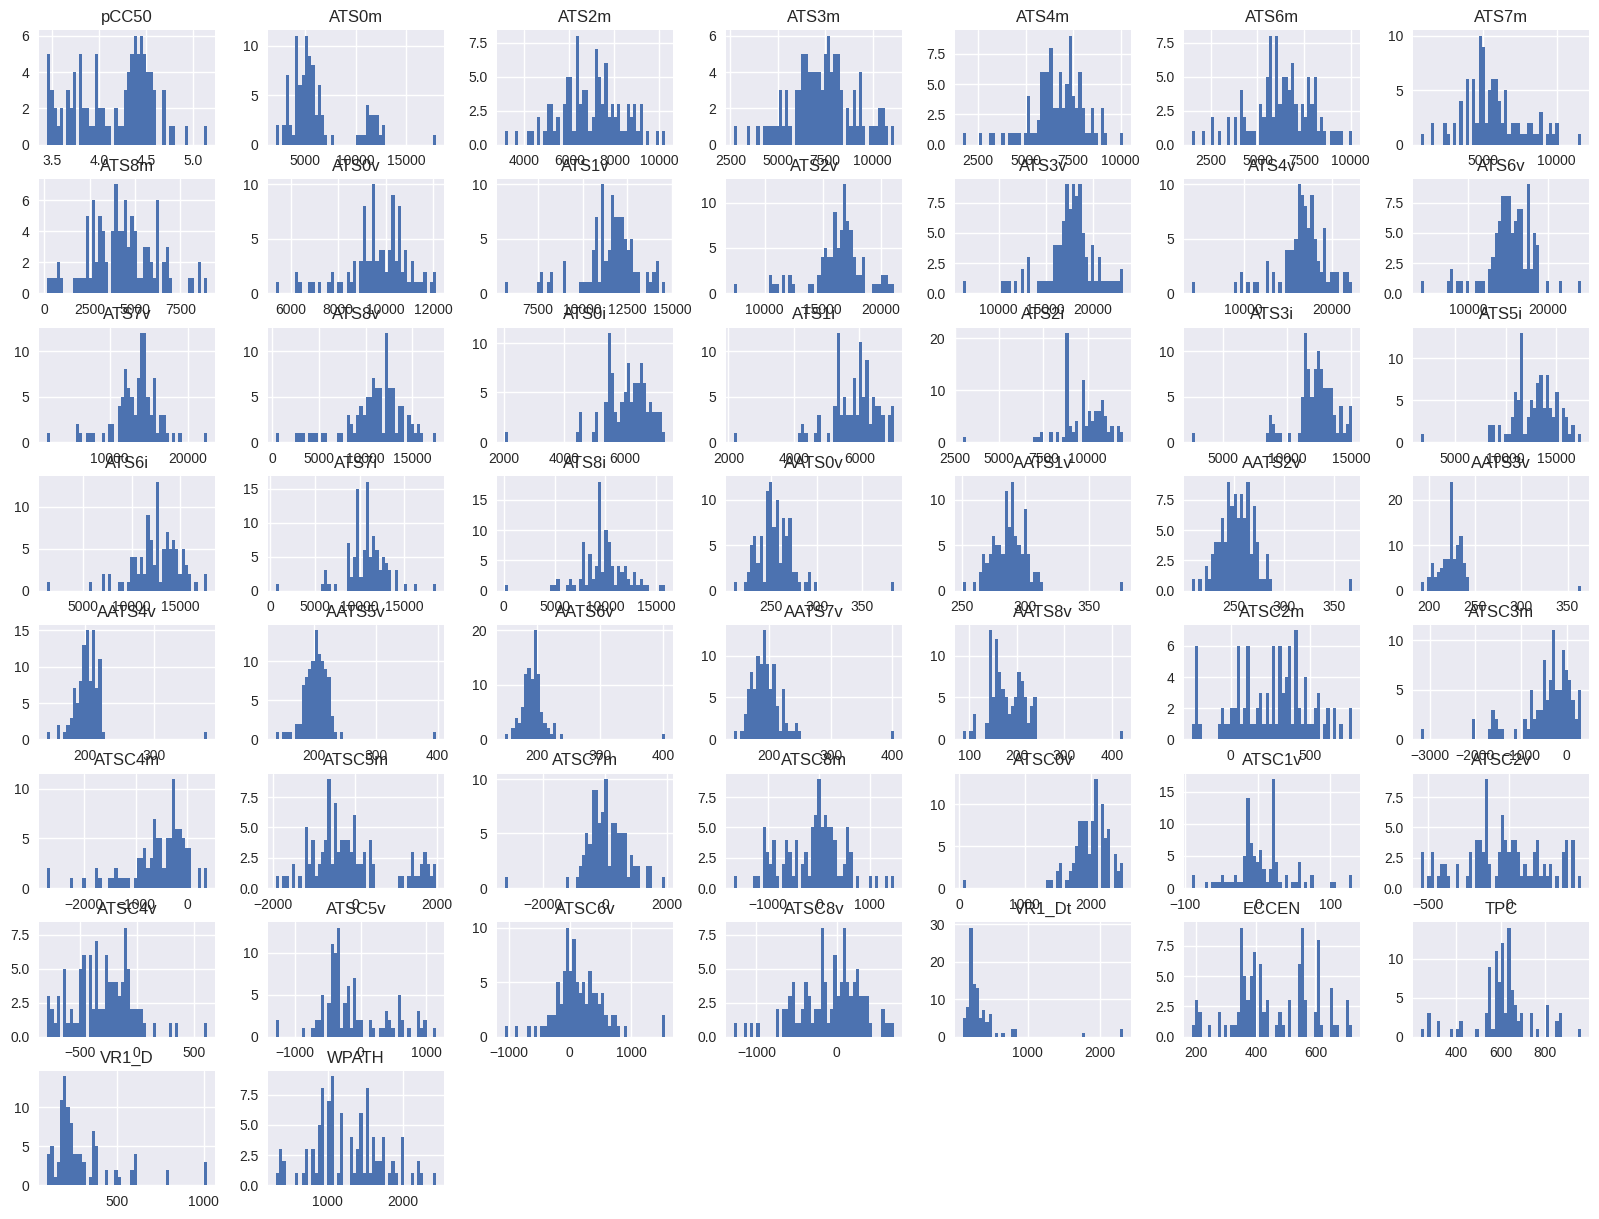

In [ ]:
df2.hist(bins = 50, figsize=(20,15))
plt.savefig('figsvr1.png')
plt.show()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train
X_test

array([[ 1.70168271e+00,  1.36615980e+00,  1.15329803e+00,
         8.85416347e-01,  9.02527797e-01,  1.26227487e+00,
         2.26466999e+00,  8.75446866e-01,  5.42807286e-01,
         5.68655827e-01,  6.35673915e-01,  5.01212226e-01,
         1.36192421e-02,  3.31411818e-01,  1.05799437e+00,
         9.38225635e-02,  2.71863947e-01, -1.60941716e-02,
         2.46735425e-01,  4.24188290e-01, -4.30123534e-01,
        -4.07558611e-01, -6.20100055e-01,  1.15335543e+00,
         8.59175971e-01,  9.23171311e-01,  8.36992284e-01,
         5.15925116e-01,  1.95722620e-01,  1.13822419e+00,
         1.59009012e+00,  1.82754731e+00,  7.76847720e-01,
        -1.42173235e+00, -1.68366304e+00,  2.72648068e+00,
        -2.17001986e-01,  1.03444351e+00,  8.40498036e-01,
         8.94685847e-02, -8.75337985e-01, -8.12318099e-01,
         2.37083880e+00, -1.55169108e+00, -2.26889684e-01,
        -3.72186000e-01,  5.27702595e-01,  1.60255484e-01,
        -5.19644180e-01,  4.62133692e-01],
       [-4.96

** Initiation of Support Vector Regressor**

In [ ]:
model = SVR()

In [ ]:
model.fit(X_train, Y_train)

SVR()

In [ ]:
Y_train_pred = model.predict(X_train)

In [ ]:
print(Y_train_pred)

[4.40006639 3.91230137 4.02486813 3.55401272 3.82600558 4.06543381
 4.82314631 4.39867913 3.92163657 3.97868544 4.2541497  4.4550339
 4.36227497 4.31965515 4.27577995 4.37848453 3.56634609 3.50270047
 4.39451915 4.07327915 4.58964137 4.21544289 4.28911696 4.66805887
 3.81224263 3.54357746 3.80030133 3.67580959 4.4856803  3.93230908
 3.8231527  4.03919333 3.67326693 4.36923428 4.1395318  3.78746967
 4.39892602 3.57635319 4.35339419 4.09593568 4.12843479 4.21150868
 3.96533413 3.77082199 4.38937108 3.89264918 4.30870603 3.59275184
 4.58724406 4.47617488 4.48880471 4.25200438 4.36004057 4.07165996
 4.08018334 4.2758073  3.99846097 4.24571694 4.49803738 4.40444969
 4.43323343 4.19292829 4.23000338 4.17208353 3.76155545 4.39340838
 4.31695699 4.02388537 4.34001069 3.99660047 4.09818215 3.98416156
 3.78115747 4.1273994  4.2704232  4.41580347 3.89412603 4.21073044
 4.03076251 4.27763367]


In [ ]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [ ]:
predictions1

,Y_train,Y_train_pred
55,4.479516,4.400066
88,3.980344,3.912301
26,4.311580,4.024868
42,3.454174,3.554013
69,3.797239,3.826006
...,...,...
60,4.515415,4.415803
71,4.472757,3.894126
14,4.316413,4.210730
92,3.930369,4.030763


In [ ]:
len(Y_train_pred)

80

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))

The training r_sq is: 0.8070


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))

The MAE is: 0.1357


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

The RMSE is: 0.1710


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The EVS is: 0.8076


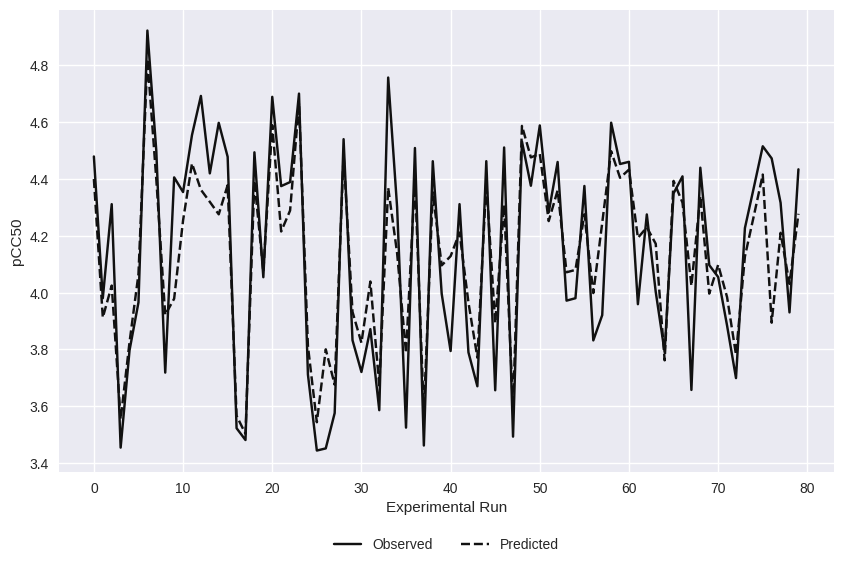

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

array([4.24399212, 4.00468763, 3.82634974, 4.55413441, 3.79616792,
       4.57101186, 4.2946398 , 4.01075053, 4.23907405, 4.00558846,
       3.76557553, 4.09309846, 4.39051985, 4.05611872, 3.92432319,
       4.26304985, 3.65402873, 3.67392476, 4.25586107, 4.45903237])

In [ ]:
len(Y_test_pred)

20

In [ ]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [ ]:
predictions2

,Y_test,Y_test_pred
83,4.566390,4.243992
53,3.584192,4.004688
70,4.421705,3.826350
45,4.567993,4.554134
44,3.505678,3.796168
39,4.784891,4.571012
22,4.271241,4.294640
80,3.793255,4.010751
10,4.255081,4.239074
0,4.176200,4.005588


In [ ]:
print('The testing r_sq is: %.4f'% r2_score(Y_test, Y_test_pred))

The testing r_sq is: 0.1073


In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test))

The testing r_sq is: 0.1073


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_pred))

The MAE is: 0.2906


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 0.4049


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))


The EVS is: 0.1438


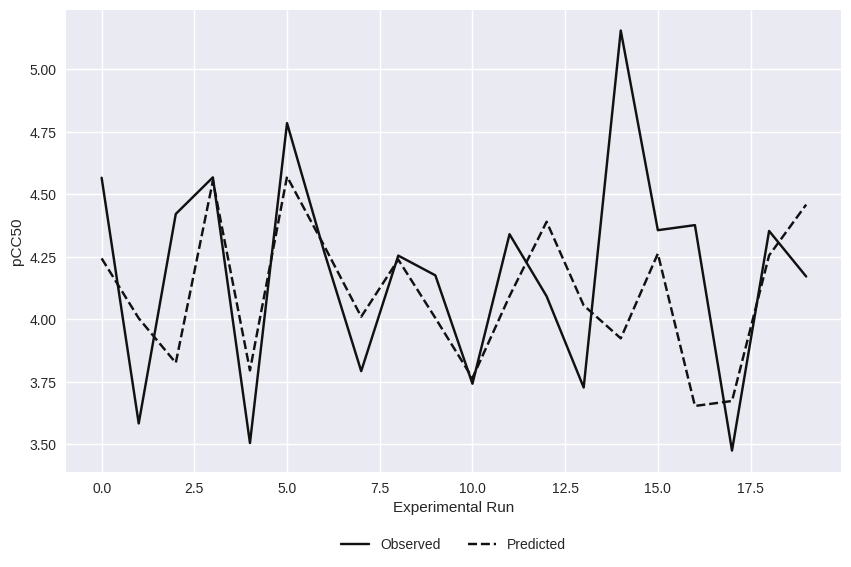

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

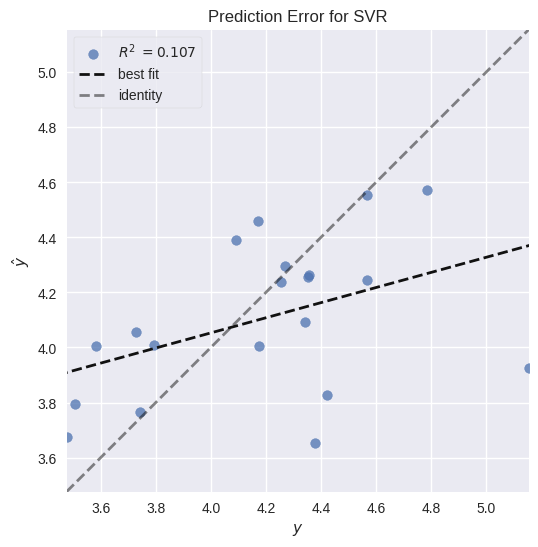

<Axes: title={'center': 'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

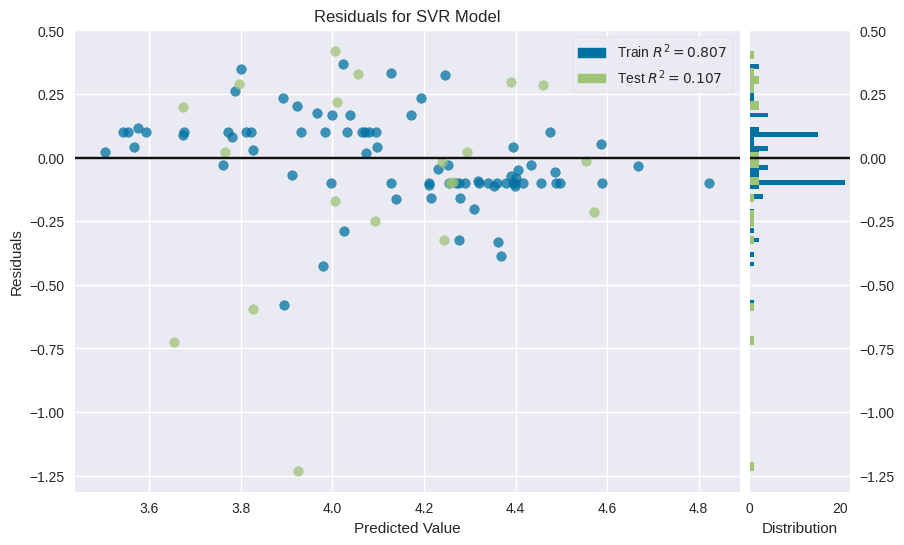

<Axes: title={'center': 'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

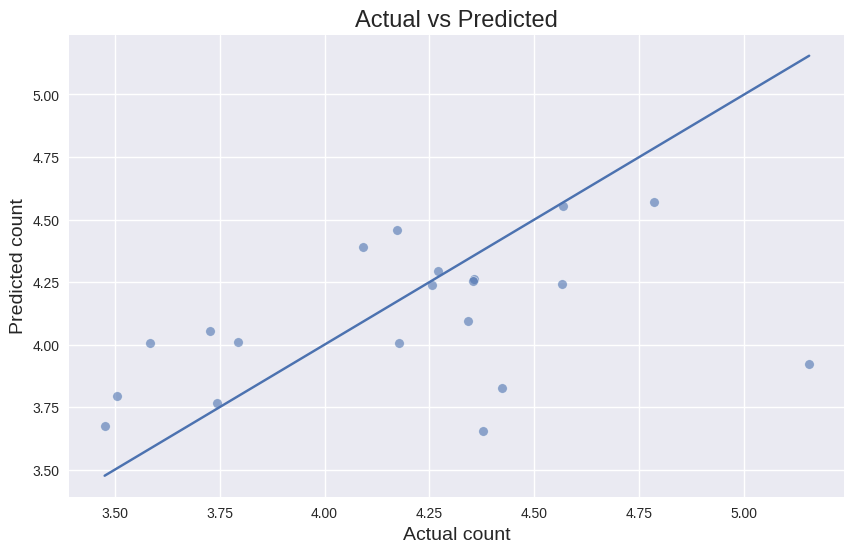

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Predicted', fontsize = 17)
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.1072791045842183

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.4

**Using Different Hyperparametere**

In [ ]:
my_param_grid = {'C':[1, 10, 100], 'gamma':[1,0.1,0.01], 'kernel': ['rbf']} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(estimator=SVR(), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator=SVR(), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.232 total time=   0.0s
[CV 2/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.130 total time=   0.0s
[CV 3/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.092 total time=   0.0s
[CV 4/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.310 total time=   0.0s
[CV 5/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.011 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.124 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.226 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.013 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.011 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.089 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.024 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

**Test with Hyperparameters**

In [ ]:
Y_test_optimised = grid.predict(X_test)

In [ ]:
Y_test_optimised

array([4.24108117, 4.13917683, 3.80850734, 4.39112939, 3.69173618,
       4.55598963, 4.30182228, 4.07163685, 4.33154699, 4.01091529,
       3.62908418, 4.17356468, 4.27856754, 4.160631  , 3.84369803,
       4.29478621, 3.85693637, 3.87343222, 4.25520973, 4.53800169])

In [ ]:
predictions2['Y_test_optimised'] = Y_test_optimised
predictions2.head()

,Y_test,Y_test_pred,Y_test_optimised
83,4.566390,4.243992,4.241081
53,3.584192,4.004688,4.139177
70,4.421705,3.826350,3.808507
45,4.567993,4.554134,4.391129
44,3.505678,3.796168,3.691736


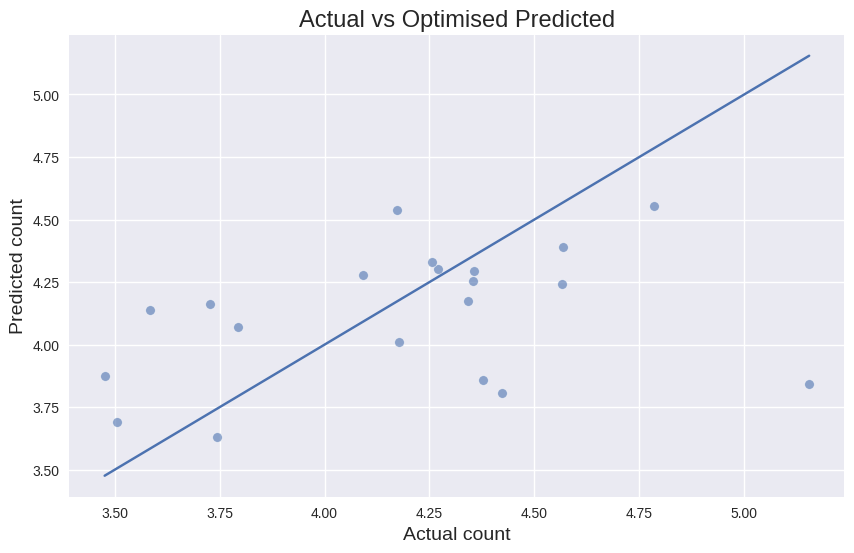

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_optimised, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()


In [ ]:
grid.score(X_test, Y_test)

0.025645182949786793

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_optimised)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.42

In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test_optimised))

The testing r_sq is: 0.8433


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_optimised))

The MAE is: 0.3146


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_optimised)))

The RMSE is: 0.4230


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_optimised))

The EVS is: 0.0477


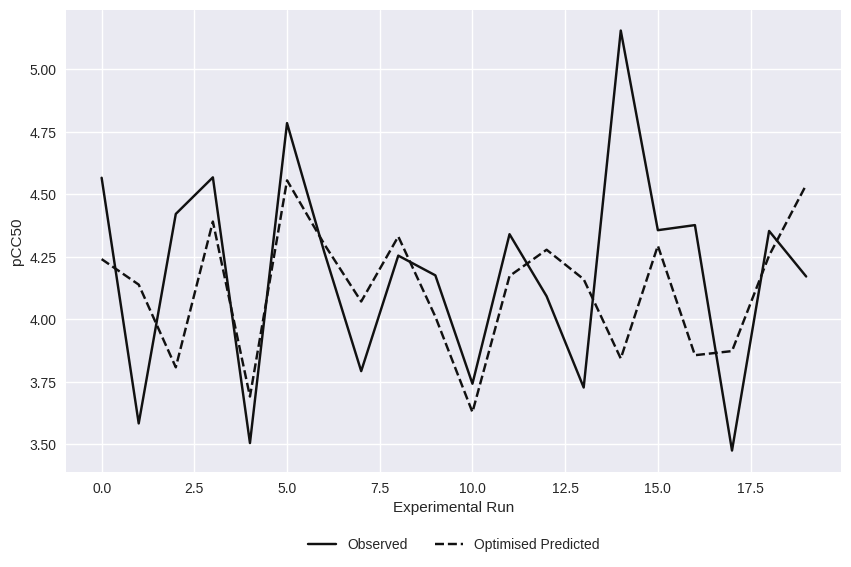

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

**Train with hyperparameters**

In [ ]:
Y_train_optimised = grid.predict(X_train)

In [ ]:
Y_train_optimised

array([4.50030509, 3.97107529, 3.87599339, 3.55403305, 3.89671628,
       4.06581445, 4.72701413, 4.39909423, 4.05015016, 3.9371628 ,
       4.25419288, 4.45529909, 4.36521064, 4.34455786, 4.23169776,
       4.37832873, 3.62250184, 3.58114396, 4.41118384, 4.12040028,
       4.54344963, 4.27535887, 4.25719113, 4.60070658, 4.05225341,
       3.5440871 , 4.09932895, 3.6757783 , 4.44081456, 3.93244519,
       3.85355962, 4.14899729, 3.61946013, 4.2163619 , 3.98162359,
       3.97860741, 4.36737123, 3.61104911, 4.36315458, 4.09615078,
       4.20983971, 4.21384949, 4.22887299, 3.64435116, 4.36299383,
       3.9859922 , 4.14232237, 3.70853735, 4.61716025, 4.47612509,
       4.41468954, 4.26924767, 4.30437713, 4.07189397, 4.08691744,
       4.34180919, 4.09559742, 4.29220312, 4.40657161, 4.35260748,
       4.45276285, 4.24344579, 4.32750665, 4.20761773, 3.7907255 ,
       4.38036801, 4.30920393, 4.08857743, 4.33983322, 3.9972333 ,
       4.08702839, 3.99006636, 3.79842571, 4.1275753 , 4.27022

In [ ]:
predictions1['Y_train_optimised'] = Y_train_optimised
predictions1.head()

,Y_train,Y_train_pred,Y_train_optimised
55,4.479516,4.400066,4.500305
88,3.980344,3.912301,3.971075
26,4.311580,4.024868,3.875993
42,3.454174,3.554013,3.554033
69,3.797239,3.826006,3.896716


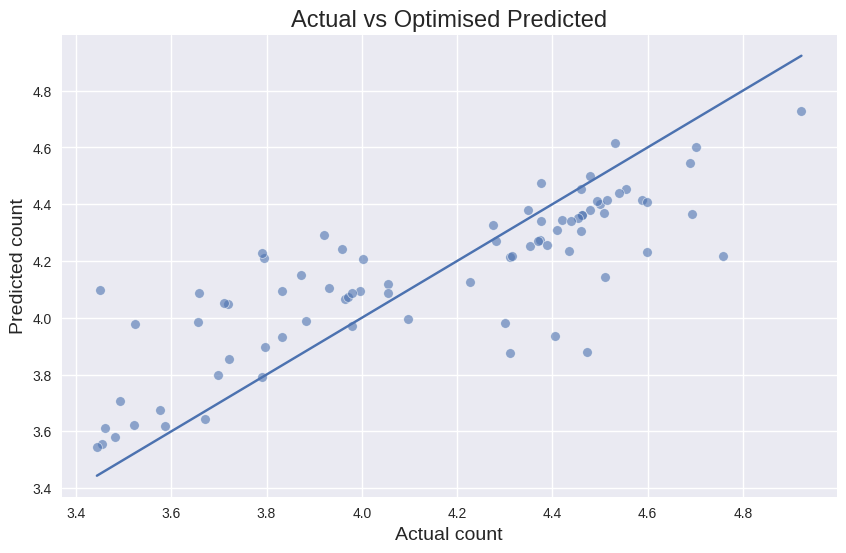

In [ ]:
sns.scatterplot(x=Y_train, y=Y_train_optimised, alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train_optimised))

The training r_sq is: 0.9055


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_optimised))

The MAE is: 0.1750


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_optimised)))

The RMSE is: 0.2279


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_optimised))

The EVS is: 0.6575


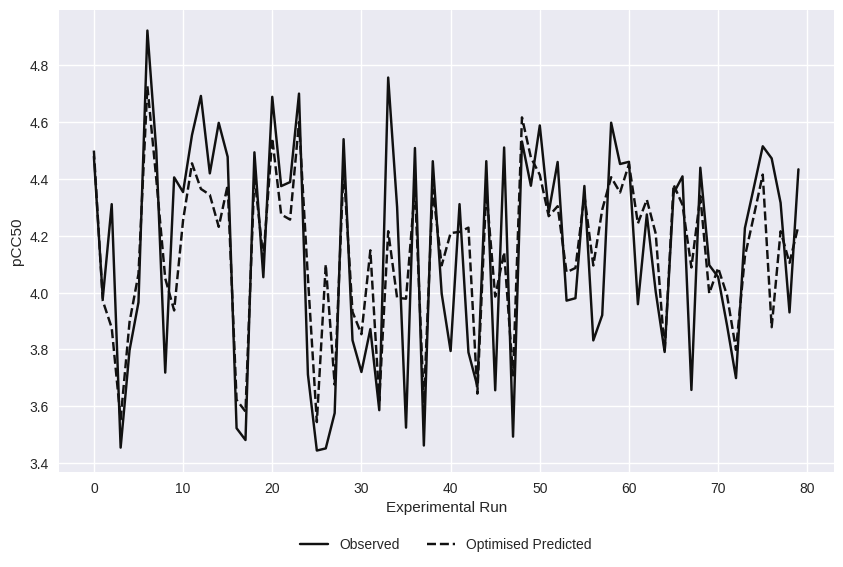

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

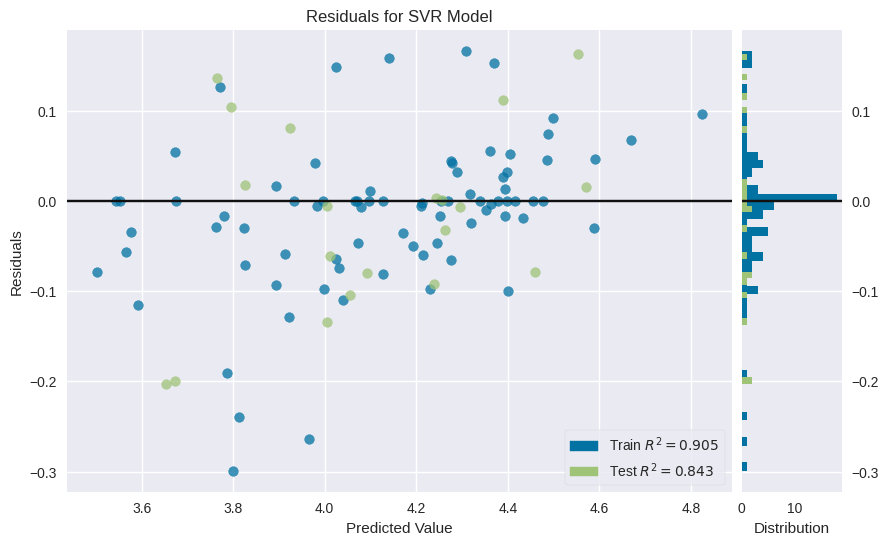

<Axes: title={'center': 'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train_optimised)
visualizer.score(X_test, Y_test_optimised)
visualizer.poof()

In [ ]:
features = list(X.columns)

In [ ]:
features

['ATS0m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0i',
 'ATS1i',
 'ATS2i',
 'ATS3i',
 'ATS5i',
 'ATS6i',
 'ATS7i',
 'ATS8i',
 'AATS0v',
 'AATS1v',
 'AATS2v',
 'AATS3v',
 'AATS4v',
 'AATS5v',
 'AATS6v',
 'AATS7v',
 'AATS8v',
 'ATSC2m',
 'ATSC3m',
 'ATSC4m',
 'ATSC5m',
 'ATSC7m',
 'ATSC8m',
 'ATSC0v',
 'ATSC1v',
 'ATSC2v',
 'ATSC4v',
 'ATSC5v',
 'ATSC6v',
 'ATSC8v',
 'VR1_Dt',
 'ECCEN',
 'TPC',
 'VR1_D',
 'WPATH']

In [ ]:
model.fit(X_train, Y_train)

SVR()

In [ ]:
importance = model.feature_importances_
importance

AttributeError: ignored

In [ ]:
FIM = pd.DataFrame({'features' : features, 'feature_importances' : importance})
FIM

In [ ]:
fig = plt.figure(dpi=800)
plt.figure(figsize=(10,20))
plt.title('feature importances')
sns.barplot(y='features', x='feature_importances', data=FIM)
plt.savefig('figsvr2.png')

plt.show()

In [ ]:
!pip install shap

In [ ]:
import shap
X = df2.drop(['pCC50'],axis = 1)
explainer = shap.TreeExplainer(model,feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X)

In [ ]:
plt.figure(dpi=300)
shap.summary_plot(shap_values, X,show=False,color_bar=False)
plt.xlabel("SHAP value of pCC50 model" ,fontweight='bold',fontsize=6)
plt.tick_params(labelsize=6,)
plt.savefig('figsvr3.png')

plt.show()